# Toyota Corolla Price Prediction - Multiple Linear Regression


###   Import Libraries and Load Dataset


In [2]:
pip install statsmodels 

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 8.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.6 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.6 MB 3.4 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.6 MB 3.5 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 3.5 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.6 MB 3.6 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 3.5 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 3.7 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 3.6 MB/s eta 0:00:01
   ----------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### Load dataset


In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


###  Exploratory Data Analysis (EDA)

In [3]:
# Basic info
print("\nShape:", df.shape)
print("\nInfo:")
df.info()


Shape: (1436, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min  

### *1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.*

In [5]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [9]:
# Value counts for categorical
print("\nFuelType Counts:")
print(df['Fuel_Type'].value_counts())
print("\nDoors Counts:")
print(df['Doors'].value_counts())


FuelType Counts:
Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

Doors Counts:
Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64


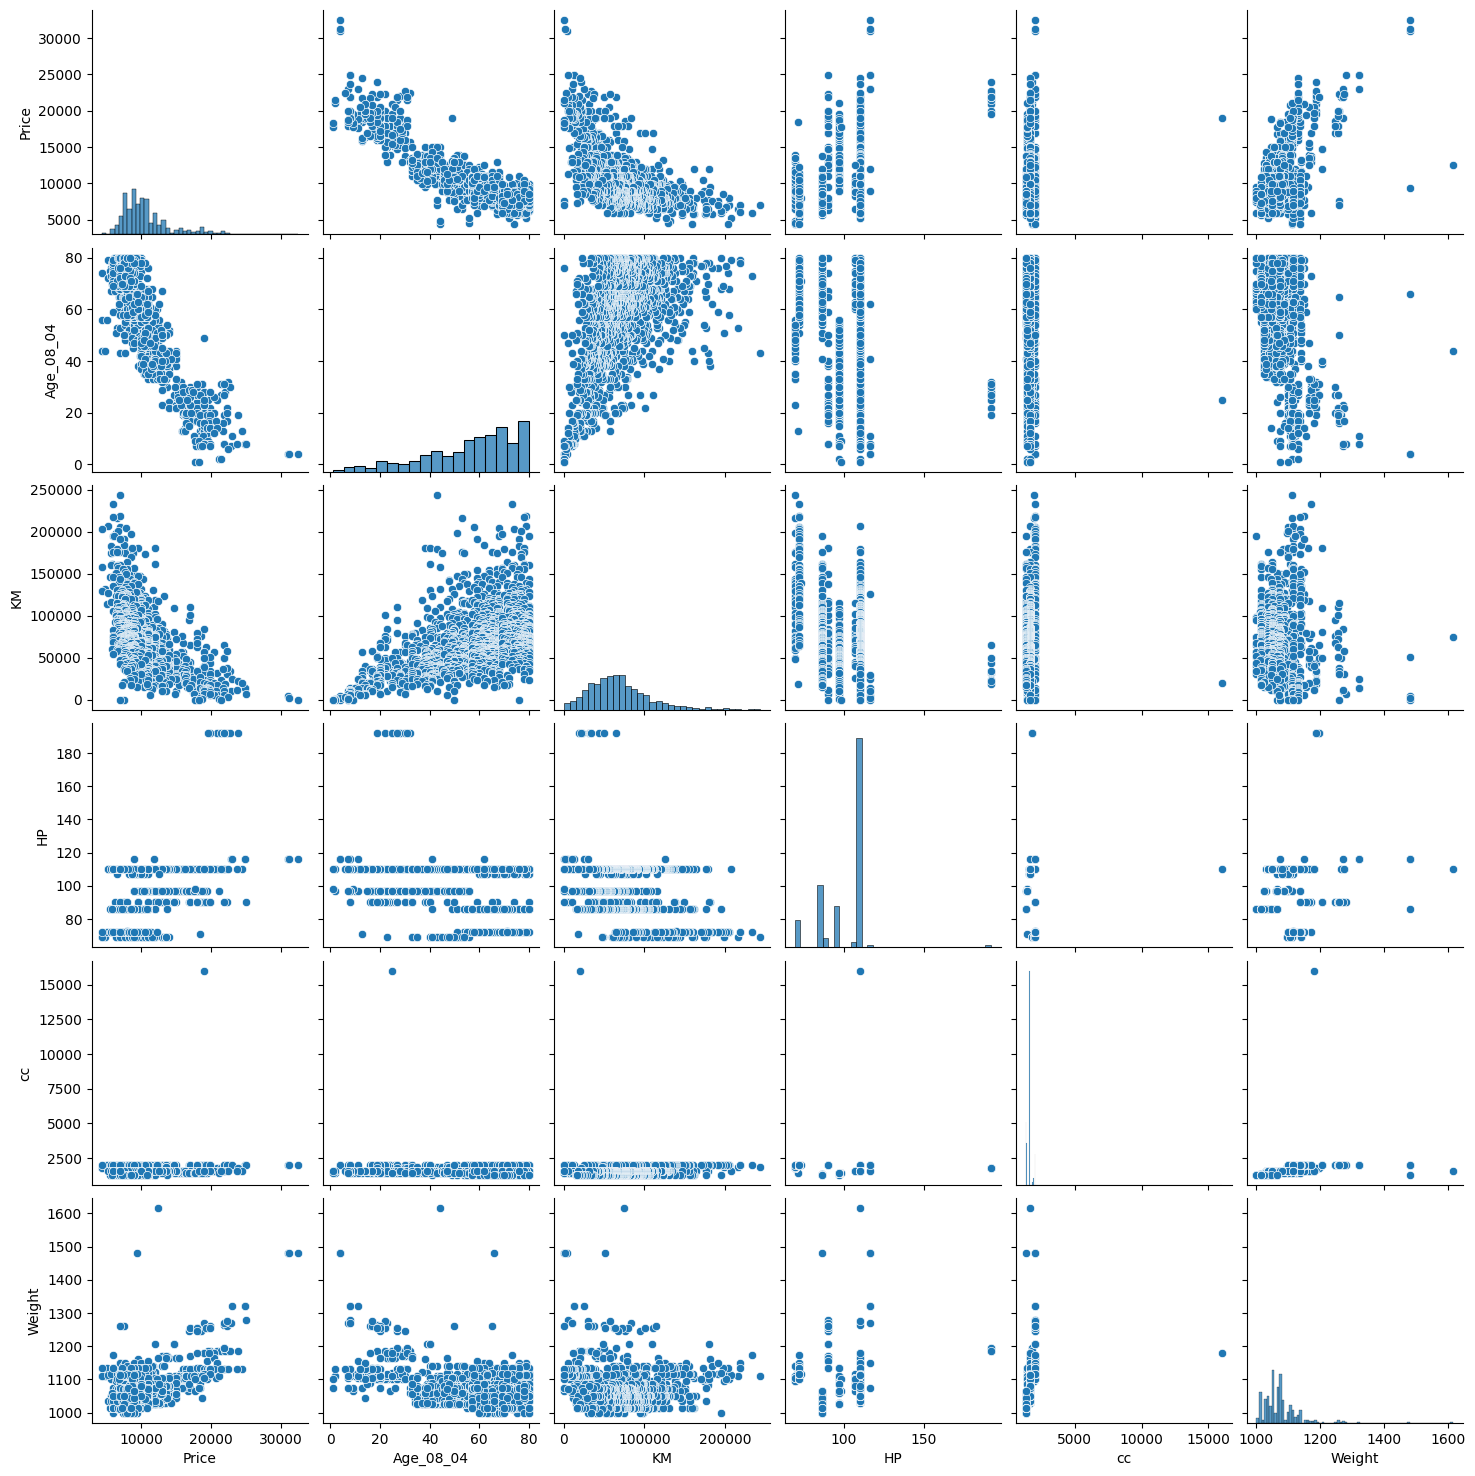

In [10]:
# 📉 Visualizations
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.show()

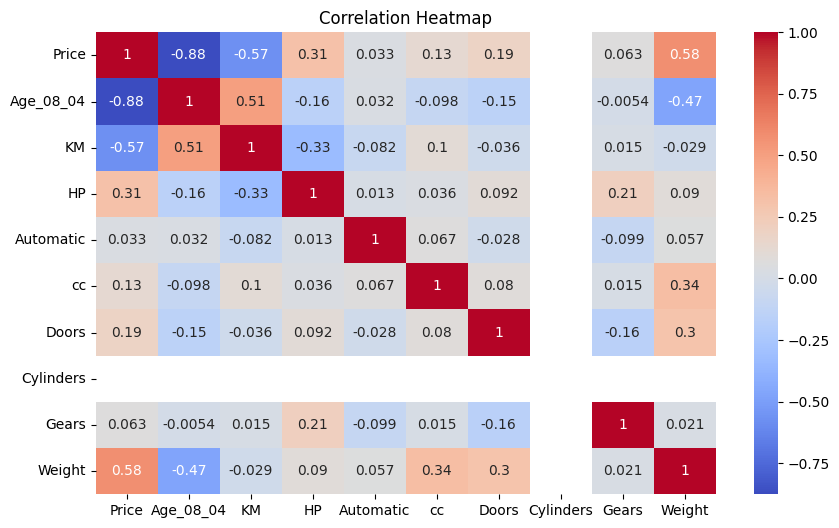

In [17]:
encoded_df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
encoded_df['Doors'] = pd.to_numeric(encoded_df['Doors'], errors='coerce')
encoded_df['Doors'] = encoded_df['Doors'].fillna(encoded_df['Doors'].median())

numeric_cols = encoded_df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10,6))
sns.heatmap(encoded_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### *2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).*

In [ ]:
# Features and Target
X = encoded_df.drop(columns=['Price'])
y = encoded_df['Price']


In [19]:


# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### *3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.*

In [26]:
# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print("\nModel 1 Coefficients:")
print(pd.Series(model1.coef_, index=X.columns))
print("\nModel 1 Intercept:", model1.intercept_)



Model 1 Coefficients:
Age_08_04          -2.246662e+03
KM                 -6.085706e+02
HP                  2.102533e+02
Automatic           3.413608e+01
cc                 -1.288507e+01
Doors              -5.743684e+01
Cylinders          -5.115908e-13
Gears               1.039463e+02
Weight              1.362139e+03
Fuel_Type_Diesel   -2.127088e+01
Fuel_Type_Petrol    4.451027e+02
dtype: float64

Model 1 Intercept: 10746.677976264662


In [27]:
# Model 2: Using statsmodels to check significance
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nModel 2 Summary (OLS):")
print(ols_model.summary())


Model 2 Summary (OLS):
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Mon, 14 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:58:11   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.075e+04     38

In [28]:
# Model 3: Remove features with high p-values or use domain knowledge to drop
# (Assume we keep only features with p < 0.05)
significant_columns = [X.columns[i-1] for i, pval in enumerate(ols_model.pvalues) if pval < 0.05 and i != 0]
X_train_sig = X[significant_columns].iloc[y_train.index]
X_test_sig = X[significant_columns].iloc[y_test.index]

scaler_sig = StandardScaler()
X_train_sig_scaled = scaler_sig.fit_transform(X_train_sig)
X_test_sig_scaled = scaler_sig.transform(X_test_sig)

model3 = LinearRegression()
model3.fit(X_train_sig_scaled, y_train)
y_pred3 = model3.predict(X_test_sig_scaled)


### *4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.*

In [29]:
# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}:")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model(y_test, y_pred1, "Model 1 (All features)")
# Evaluate Model 2 only on training data (since OLS used training input)
evaluate_model(y_train, ols_model.predict(X_train_sm), "Model 2 (OLS on training data)")
evaluate_model(y_test, y_pred3, "Model 3 (Significant features)")


Evaluation for Model 1 (All features):
R2 Score: 0.834888804061108
MAE: 990.887273919397
MSE: 2203043.823143705
RMSE: 1484.2654153296521

Evaluation for Model 2 (OLS on training data):
R2 Score: 0.8702643169608926
MAE: 956.6895753326805
MSE: 1698694.1713486246
RMSE: 1303.339622411835

Evaluation for Model 3 (Significant features):
R2 Score: 0.8351368970531263
MAE: 997.8091461706517
MSE: 2199733.5707376036
RMSE: 1483.1498814137442


### *5.Apply Lasso and Ridge methods on the model.*

In [31]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


Evaluation for Lasso Regression:
R2 Score: 0.8349119754675461
MAE: 990.9001017177329
MSE: 2202734.6519603897
RMSE: 1484.1612621141915


In [32]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")


Evaluation for Ridge Regression:
R2 Score: 0.8349066452386907
MAE: 990.8852174455266
MSE: 2202805.772078497
RMSE: 1484.1852216211078


#  Multiple Linear Regression on Toyota Corolla Dataset

###  Objective:
Predict the **Price** of Toyota Corolla cars using multiple predictors such as Age, KM, HP, Fuel Type, etc., through Multiple Linear Regression (MLR) and regularization methods (Lasso & Ridge).

---

## 1.  Exploratory Data Analysis (EDA)

**Dataset Overview:**
- **Rows:** 1436  
- **Columns:** 11  
- **Target Variable:** `Price`  
- **Predictors:** Age_08_04, KM, HP, Automatic, cc, Doors, Cylinders, Gears, Weight, Fuel_Type

**Missing Values:** None 
**Fuel Type Counts:**
- Petrol: 1264  
- Diesel: 155  
- CNG: 17  

**Doors Counts:**
- 5 Doors: 674  
- 3 Doors: 622  
- 4 Doors: 138  
- 2 Doors: 2  

**Summary Statistics Highlights:**
- Price Range: €4,350 to €32,500  
- Age Range: 1 to 80 months  
- KM Range: 1 to 243,000  
- Weight: 1000 to 1615 kg  

**Visual Insights:**
- Pairplots show negative correlation of `Price` with `Age` and `KM`.
- Correlation Heatmap shows:
  - `Price` is negatively correlated with `Age` (-0.88) and `KM` (-0.57)
  - Positively correlated with `Weight` (+0.58) and `HP` (+0.31)

---

## 2.  Preprocessing
- One-hot encoded `Fuel_Type` (Petrol, Diesel, CNG)
- Converted `Doors` to numeric and filled missing values using the median
- Features were **standardized** using `StandardScaler` for better model performance

---

## 3.  Model Building

###  Model 1: Linear Regression (All features)
- Intercept: 10746.68  
- Key Coefficients:
  - Age: -2246.66
  - KM: -608.57
  - HP: +210.25
  - Weight: +1362.14
  - Fuel_Type_Petrol: +445.10

---

###  Model 2: OLS (Statsmodels)
- R²: **0.870** on training data
- Statistically Significant Predictors (p < 0.05):  
  - Age, KM, HP, Gears, Cylinders

---

###  Model 3: Using only Significant Features
- Selected features based on OLS p-values
- Re-trained with scaling

---

## 4.  Model Evaluation (on Test Set)

| Model                         | R² Score | MAE (€) | RMSE (€) |
|------------------------------|----------|----------|-----------|
| **Model 1 (All features)**   | 0.8349   | 990.89   | 1484.27   |
| **Model 2 (OLS - train)**    | 0.8703   | 956.69   | 1303.34   |
| **Model 3 (Significant)**    | 0.8351   | 997.81   | 1483.15   |
| **Lasso Regression**         | 0.8349   | 990.90   | 1484.16   |
| **Ridge Regression**         | 0.8349   | 990.89   | 1484.19   |

---

## 5.  Regularization Results

- **Lasso (α=0.1):** Slight penalty applied, performance very similar to baseline linear regression  
- **Ridge (α=0.1):** Almost identical to base model; useful to reduce overfitting in larger datasets

---

## 6.  Conclusion

- **Best Model:** OLS (Model 2) performs best on training data
- **Features like Age, KM, HP, and Weight** significantly influence car price
- **All models perform well**, with RMSE around €1300–€1500 — reasonable for this problem
- **Regularization (Lasso/Ridge)** showed minimal performance change, likely due to already good model structure

---

## 7.  Interview Questions

### Q1: What is Normalization & Standardization?
- **Normalization** scales features to a range (0–1).  
- **Standardization** transforms features to mean=0, std=1.  
- Helpful for algorithms sensitive to feature scale (e.g., MLR, SVM, KNN).

### Q2: How to address multicollinearity?
- Use **VIF (Variance Inflation Factor)** to detect correlated predictors
- **Drop or combine** correlated variables
- Apply **Regularization (Lasso/Ridge)**
- Use **PCA** to reduce dimensions

---

